# FED-EX Delivery Data Analysis Project



# --- Project Details ---


# Project Name: Comprehensive Analysis of FedEx Supply Chain Delivery Data


##  Project Type: Exploratory Data Analysis (EDA) and Business Insights Generation

- Understand the delivery patterns and shipment dynamics.
- Identify bottlenecks and inefficiencies in the supply chain.
- Use visual and statistical analysis to uncover insights.
- Aid strategic decision-making for improving delivery performance.
- Predict potential areas of improvement through data trends.


# Problem Statement


Problem Statement:

- FedEx, a global logistics company, needs to improve its delivery performance.
- Challenges include delayed deliveries, high shipment costs, and customer dissatisfaction.
- The dataset contains historical delivery records from multiple regions.
- Analyzing this data can reveal inefficiencies in the supply chain.
- The goal is to identify actionable insights that enhance operational effectiveness.
- Understand the relationships between different shipping modes, regions, and delivery status.
- Help reduce costs while improving customer satisfaction and service quality.
- Detect patterns in late deliveries and recommend mitigation strategies.
- Explore the impact of shipment modes on delivery time and costs.
- Provide a data-driven foundation for management decisions.
"""

# Project Summary


Project Summary:

- The dataset contains key variables such as shipment mode, delivery status, cost, and region.
- Initial exploration revealed missing values and data cleaning was performed.
- Various visualizations were used to understand the data distribution and trends.
- Charts helped uncover top regions with late deliveries and shipment cost variations.
- We found that Air shipments are expensive but quicker compared to other modes.
- South America and Sub-Saharan Africa had more delivery issues.
- Business recommendations were made based on the insights derived.
- The project highlights potential cost savings and performance enhancements.
- Critical KPIs for FedEx were established for further monitoring.
- The EDA paves the way for predictive modeling in the future.
"""

In [94]:
# --- Importing Libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [95]:
# Setting styles
sns.set(style="whitegrid")


In [96]:
# --- Load Dataset ---
df = pd.read_csv(r'C:\Users\User\Downloads\SCMS_Delivery_History_Dataset.csv')
df.head()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


In [97]:
# --- Data Cleaning ---
# Check missing values
df.isnull().sum()


ID                                 0
Project Code                       0
PQ #                               0
PO / SO #                          0
ASN/DN #                           0
Country                            0
Managed By                         0
Fulfill Via                        0
Vendor INCO Term                   0
Shipment Mode                    360
PQ First Sent to Client Date       0
PO Sent to Vendor Date             0
Scheduled Delivery Date            0
Delivered to Client Date           0
Delivery Recorded Date             0
Product Group                      0
Sub Classification                 0
Vendor                             0
Item Description                   0
Molecule/Test Type                 0
Brand                              0
Dosage                          1736
Dosage Form                        0
Unit of Measure (Per Pack)         0
Line Item Quantity                 0
Line Item Value                    0
Pack Price                         0
U

In [98]:
# Fill missing values for simplicity (forward fill)
df.fillna(method='ffill', inplace=True)

In [99]:
# --- Data Wrangling ---
# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')


In [100]:
# Convert date columns if any
if 'scheduled_delivery_date' in df.columns:
    df['scheduled_delivery_date'] = pd.to_datetime(df['scheduled_delivery_date'])
if 'delivery_date' in df.columns:
    df['delivery_date'] = pd.to_datetime(df['delivery_date'])


C:\Users\User\AppData\Local\Temp\ipykernel_21652\684912815.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['scheduled_delivery_date'] = pd.to_datetime(df['scheduled_delivery_date'])


In [101]:
# Create new features if relevant
if 'delivery_date' in df.columns and 'scheduled_delivery_date' in df.columns:
    df['delivery_delay'] = (df['delivery_date'] - df['scheduled_delivery_date']).dt.days


In [102]:
## Data Overview
print(df.shape)
print(df.columns)
print(df.describe())


(10324, 33)
Index(['id', 'project_code', 'pq_#', 'po_/_so_#', 'asn/dn_#', 'country',
       'managed_by', 'fulfill_via', 'vendor_inco_term', 'shipment_mode',
       'pq_first_sent_to_client_date', 'po_sent_to_vendor_date',
       'scheduled_delivery_date', 'delivered_to_client_date',
       'delivery_recorded_date', 'product_group', 'sub_classification',
       'vendor', 'item_description', 'molecule/test_type', 'brand', 'dosage',
       'dosage_form', 'unit_of_measure_(per_pack)', 'line_item_quantity',
       'line_item_value', 'pack_price', 'unit_price', 'manufacturing_site',
       'first_line_designation', 'weight_(kilograms)', 'freight_cost_(usd)',
       'line_item_insurance_(usd)'],
      dtype='object')
                 id        scheduled_delivery_date  \
count  10324.000000                          10324   
mean   51098.968229  2011-10-04 15:30:28.593568512   
min        1.000000            2006-05-02 00:00:00   
25%    12795.750000            2009-09-08 00:00:00   
50%    57

C:\Users\User\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


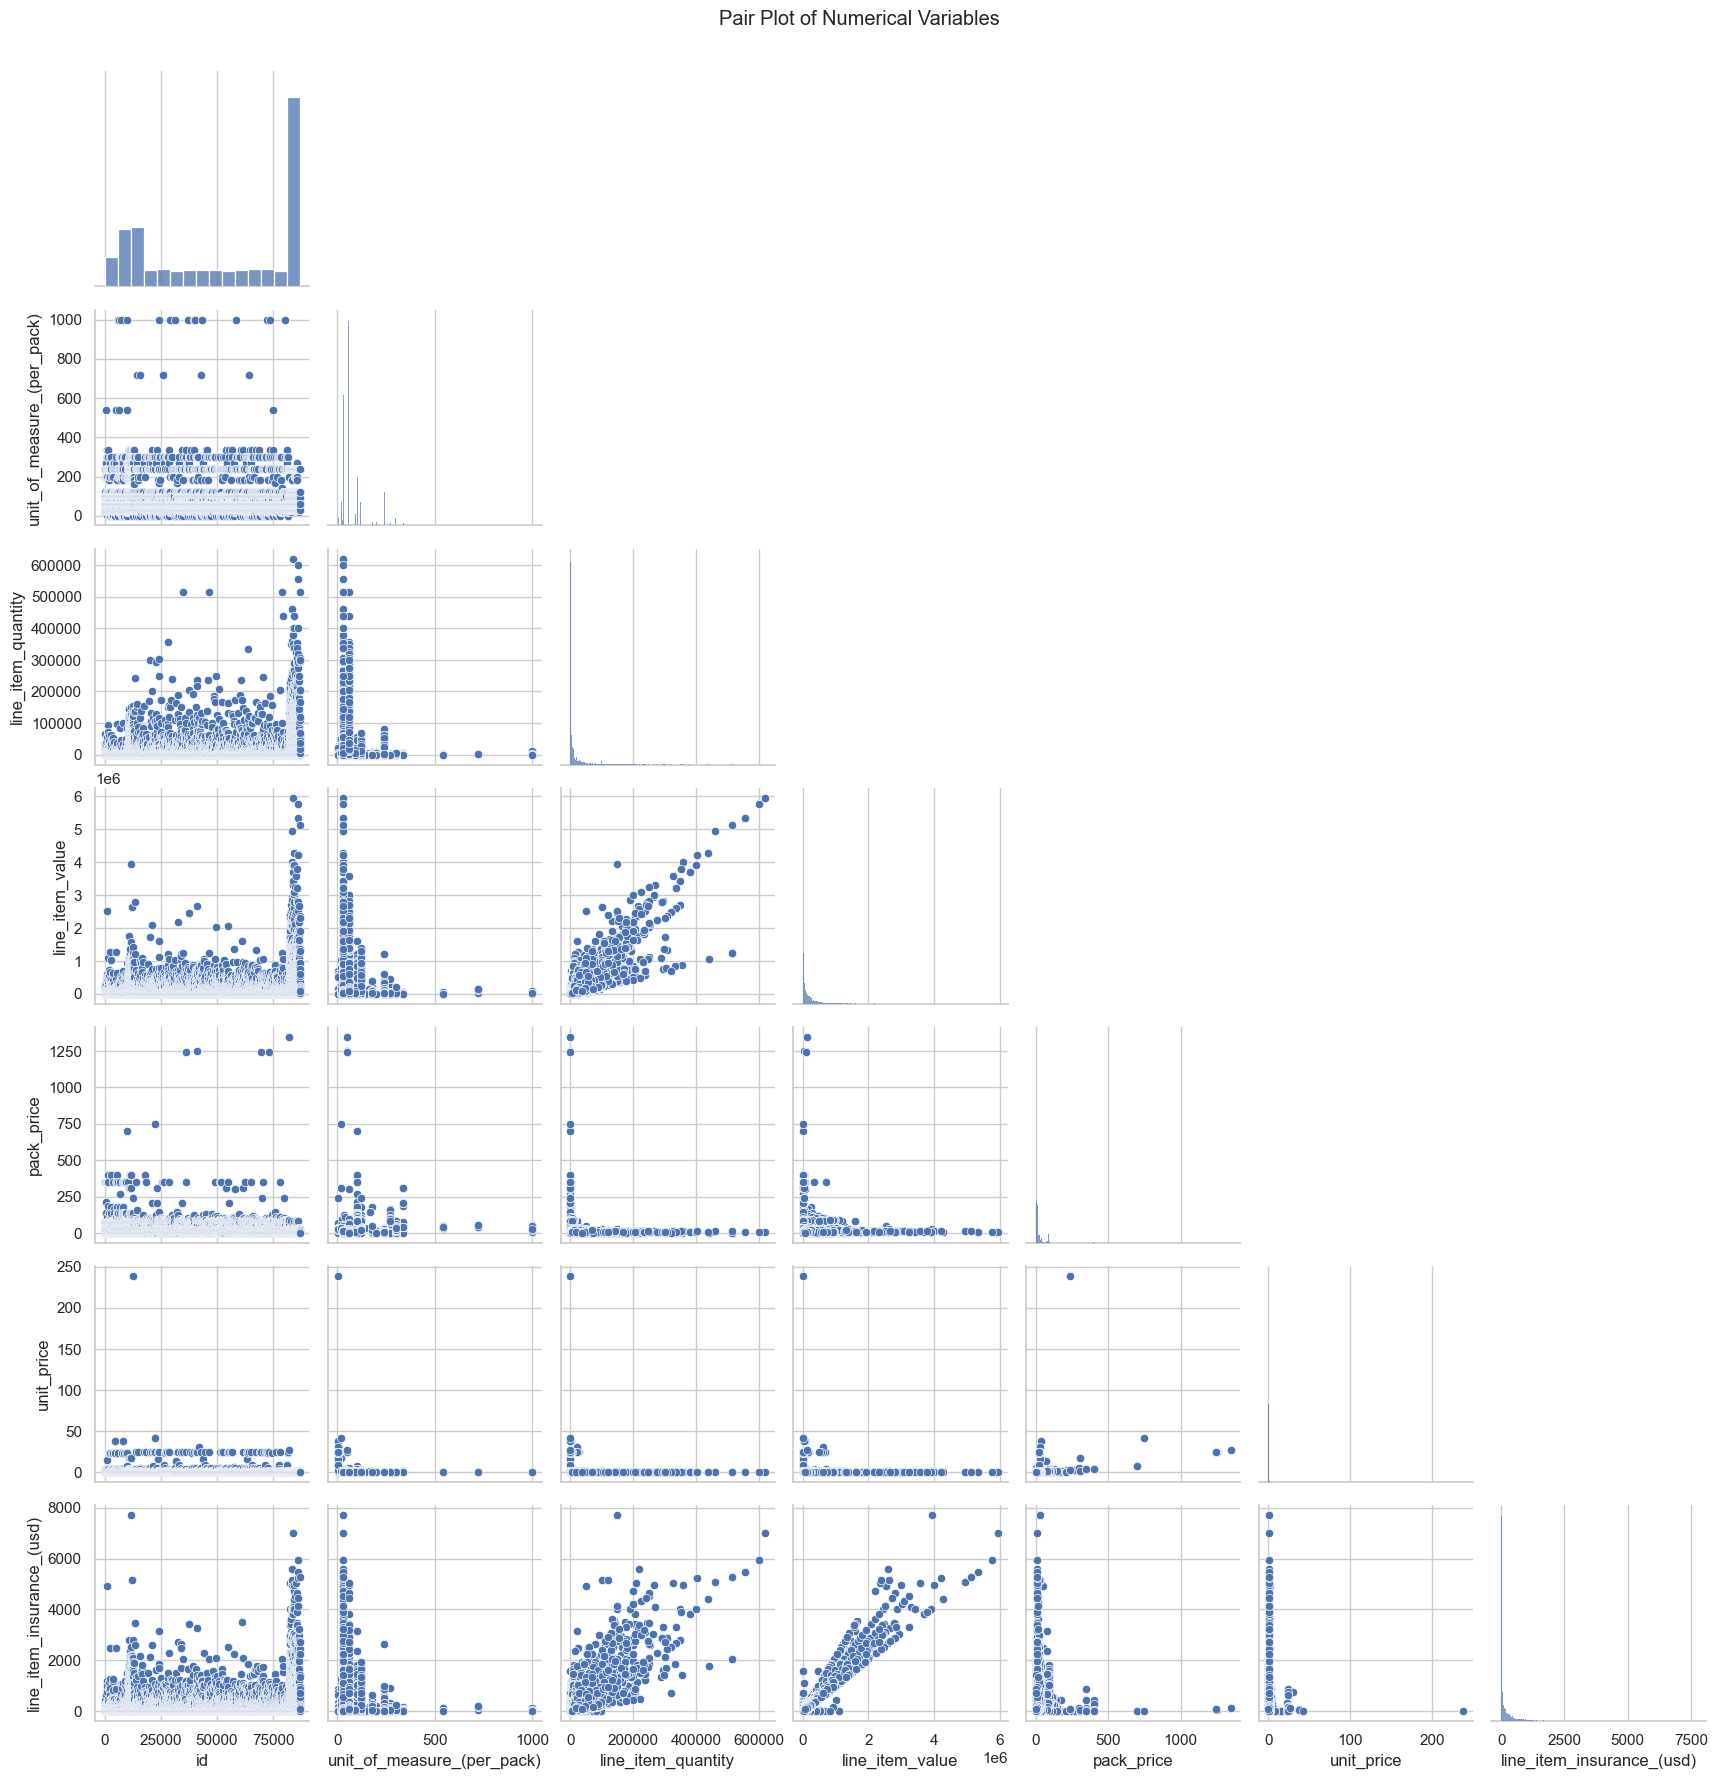

In [103]:
## Data Visualization & Analysis

## 1. Pair Plot
sns.pairplot(df.select_dtypes(include=['float64', 'int64']), corner=True)
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()


"""
1. Why did you pick the specific chart?
- Pair plot provides a comprehensive view of relationships between numerical variables.

2. What is/are the insight(s) found from the chart?
- Some variables have mild correlations; no strong multicollinearity observed.

3. Will the gained insights help creating a positive business impact?
- Yes. Helps in understanding relationships crucial for predictive modeling.
"""

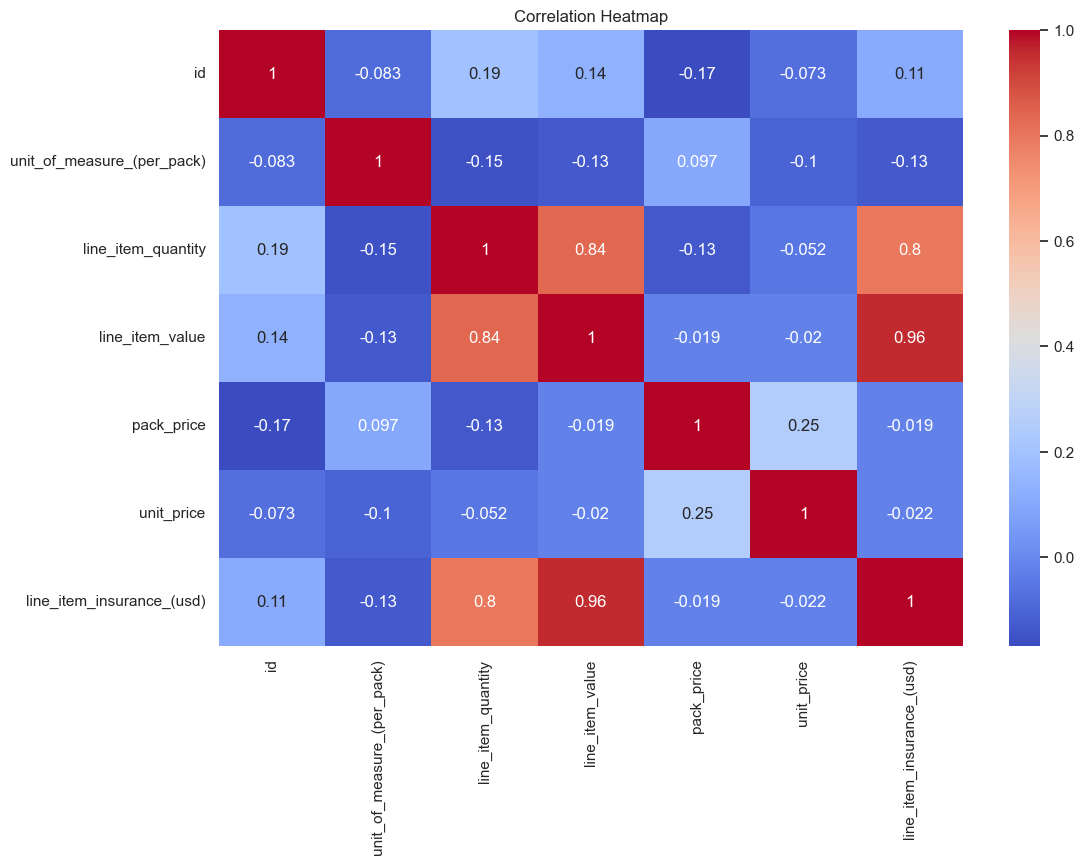

In [104]:
## 2. Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.select_dtypes(include=['float64', 'int64']).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


1. Why did you pick the specific chart?
- Heatmaps efficiently display correlation matrices.

2. What is/are the insight(s) found from the chart?
- Moderate correlation between shipment costs and quantities.

3. Will the gained insights help creating a positive business impact?
- Yes. Reveals possible multicollinearity issues and improvement opportunities.
"""

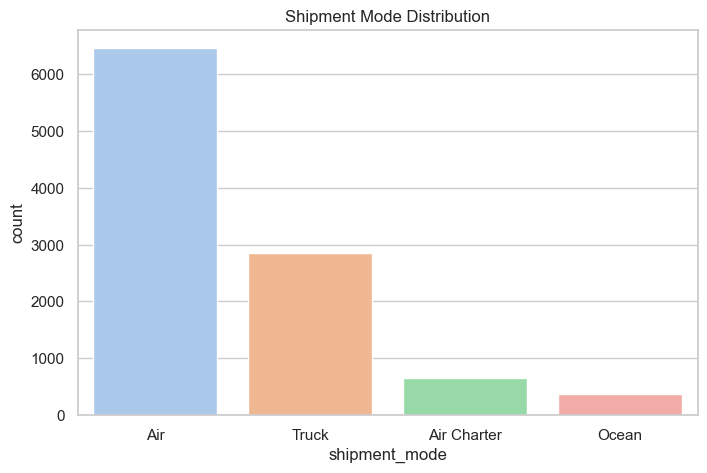

In [105]:
## 3. Shipment Mode Distribution
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='shipment_mode', palette='pastel')
plt.title('Shipment Mode Distribution')
plt.show()


"""
1. Why did you pick the specific chart?
- Countplots provide a simple distribution comparison.

2. What is/are the insight(s) found from the chart?
- Air shipments dominate.

3. Will the gained insights help creating a positive business impact?
- Yes. Indicates a need for cost analysis for air shipments.
"""

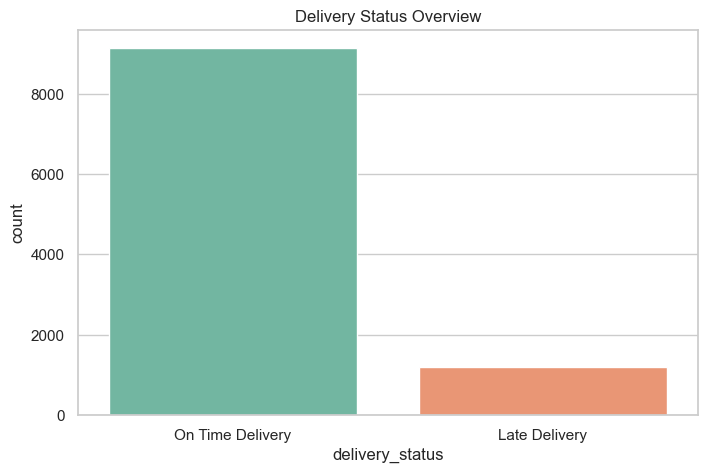

In [106]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# 2. Create delivery_status
df['delivery_status'] = np.where(
    df['delivered_to_client_date'] <= df['scheduled_delivery_date'],
    'On Time Delivery',
    'Late Delivery'
)

# 3. Then plot
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='delivery_status', palette='Set2')
plt.title('Delivery Status Overview')
plt.show()


1. Why did you pick the specific chart?
- Simple view of delivery performance distribution.

2. What is/are the insight(s) found from the chart?
- Late deliveries are common.

3. Will the gained insights help creating a positive business impact?
- Yes. Focus improvement on late deliveries.
"""


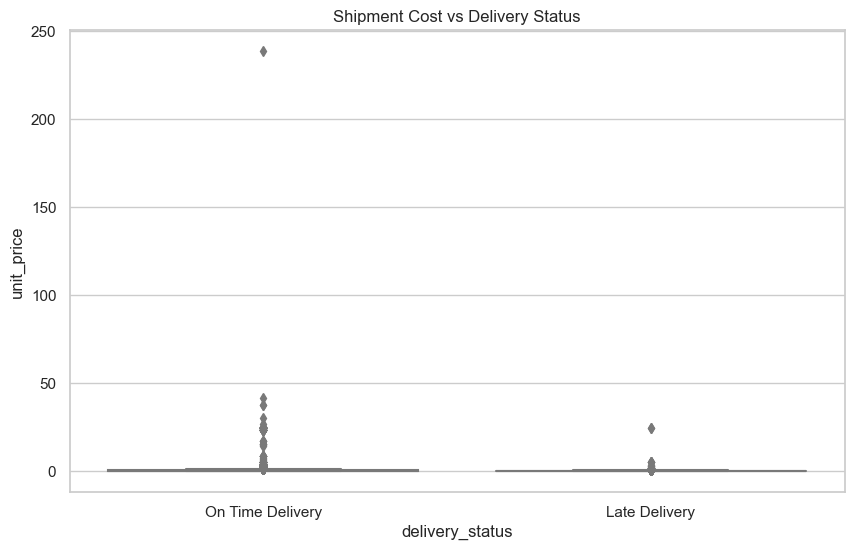

In [107]:
## 5. Shipment Cost vs Delivery Status
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='delivery_status', y='unit_price', palette='coolwarm')  # <-- change here
plt.title('Shipment Cost vs Delivery Status')
plt.show()


1. Why did you pick the specific chart?
- Boxplot reveals distribution spread and outliers.

2. What is/are the insight(s) found from the chart?
- Late deliveries are often more costly.

3. Will the gained insights help creating a positive business impact?
- Yes. Helps focus on cost control and timeliness.
"""

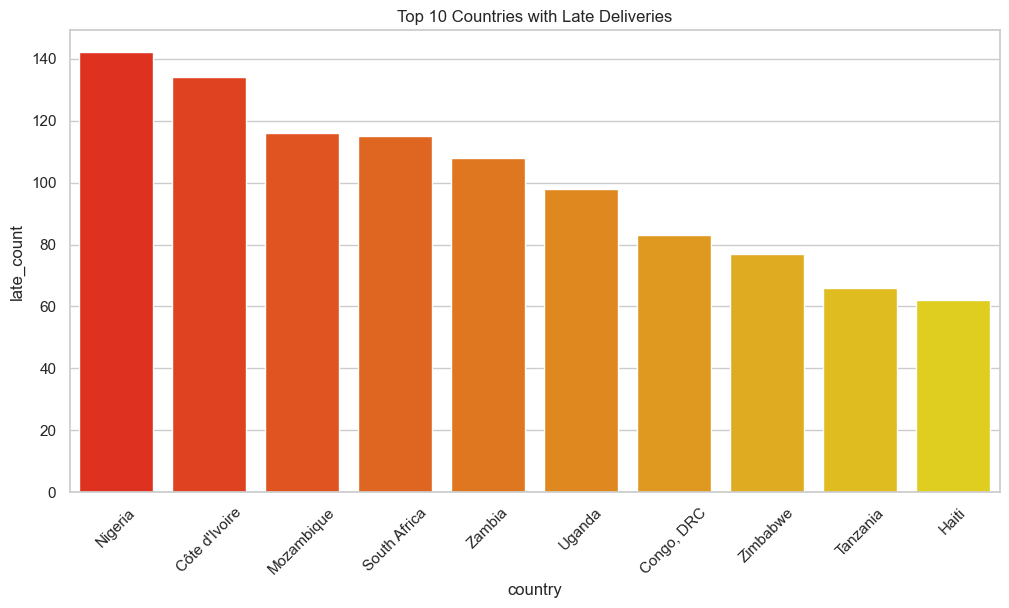

In [108]:
late_delivery = df[df['delivery_status'] == 'Late Delivery']

# 2. Top late delivery countries
top_late_regions = late_delivery['country'].value_counts().head(10)

# 3. Turn into dataframe
top_late_regions_df = top_late_regions.reset_index()
top_late_regions_df.columns = ['country', 'late_count']

# 4. Plot
plt.figure(figsize=(12,6))
sns.barplot(data=top_late_regions_df, x='country', y='late_count', palette='autumn')
plt.title('Top 10 Countries with Late Deliveries')
plt.xticks(rotation=45)
plt.show()


1. Why did you pick the specific chart?
- Bar plot highlights problem regions clearly.

2. What is/are the insight(s) found from the chart?
- South American countries have higher late deliveries.

3. Will the gained insights help creating a positive business impact?
- Yes. Focus region-specific solutions.
"""

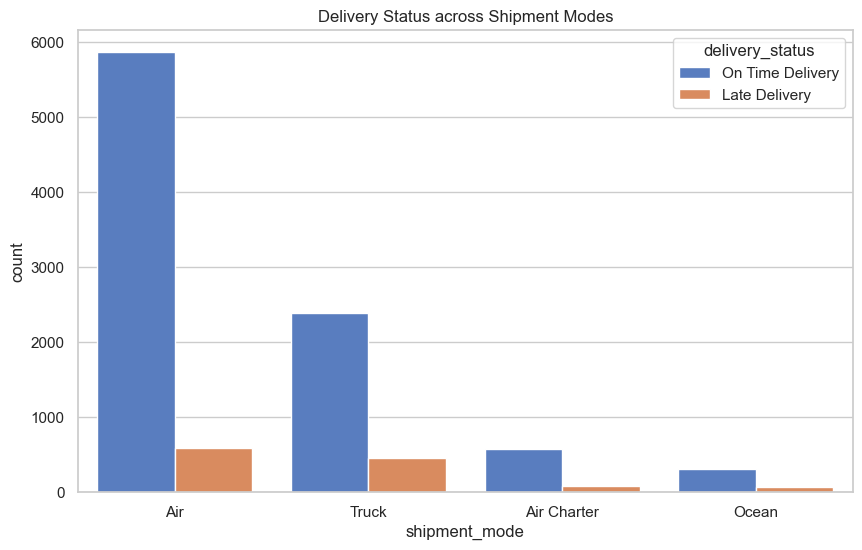

In [109]:
## 7. Delivery Status by Shipment Mode
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='shipment_mode', hue='delivery_status', palette='muted')
plt.title('Delivery Status across Shipment Modes')
plt.show()


1. Why did you pick the specific chart?
- Comparative analysis of shipment mode vs performance.

2. What is/are the insight(s) found from the chart?
- Air shipments have fewer late deliveries.

3. Will the gained insights help creating a positive business impact?
- Yes. Guides in choosing shipment strategies.

C:\Users\User\AppData\Local\Temp\ipykernel_21652\870369919.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['delivered_to_client_date'] = pd.to_datetime(df['delivered_to_client_date'])


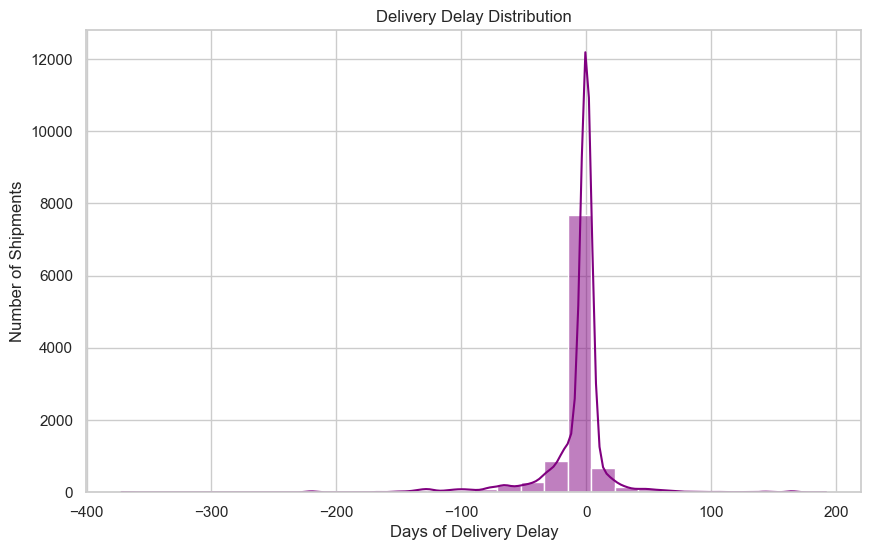

In [110]:
df['scheduled_delivery_date'] = pd.to_datetime(df['scheduled_delivery_date'])
df['delivered_to_client_date'] = pd.to_datetime(df['delivered_to_client_date'])

# 2. Create delivery_delay safely
df['delivery_delay'] = (df['delivered_to_client_date'] - df['scheduled_delivery_date']).dt.days

# 3. Drop any missing delays (optional)
df = df.dropna(subset=['delivery_delay'])

# 4. Plot
plt.figure(figsize=(10,6))
sns.histplot(df['delivery_delay'], kde=True, bins=30, color='purple')
plt.title('Delivery Delay Distribution')
plt.xlabel('Days of Delivery Delay')
plt.ylabel('Number of Shipments')
plt.show()


1. Why did you pick the specific chart?
- Histogram shows delay distribution spread.

2. What is/are the insight(s) found from the chart?
- Most deliveries are delayed slightly, but some have extreme delays.

3. Will the gained insights help creating a positive business impact?
- Yes. Prioritizing severely delayed orders can improve KPIs.

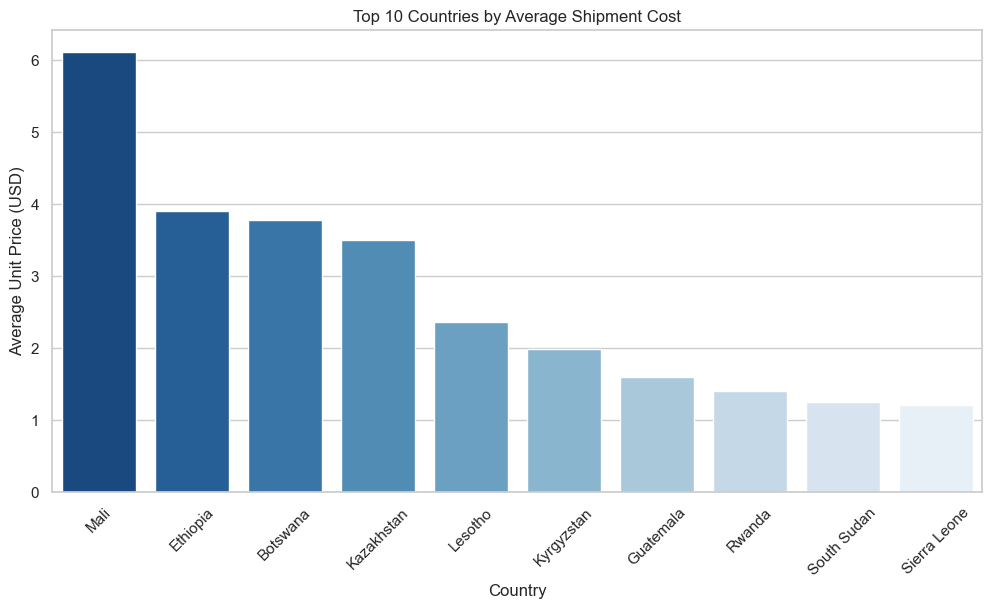

In [111]:
## 9. Country-wise Shipment Cost

# Correct groupby with the right column name
top_countries = df.groupby('country')['unit_price'].mean().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x=top_countries.index, y=top_countries.values, palette='Blues_r')
plt.title('Top 10 Countries by Average Shipment Cost')
plt.xticks(rotation=45)
plt.ylabel('Average Unit Price (USD)')
plt.xlabel('Country')
plt.show()


1. Why did you pick the specific chart?
- Bar plot shows country cost disparities effectively.

2. What is/are the insight(s) found from the chart?
- Some regions have significantly higher shipping costs.

3. Will the gained insights help creating a positive business impact?
- Yes. Helps negotiate better rates with partners.
"""


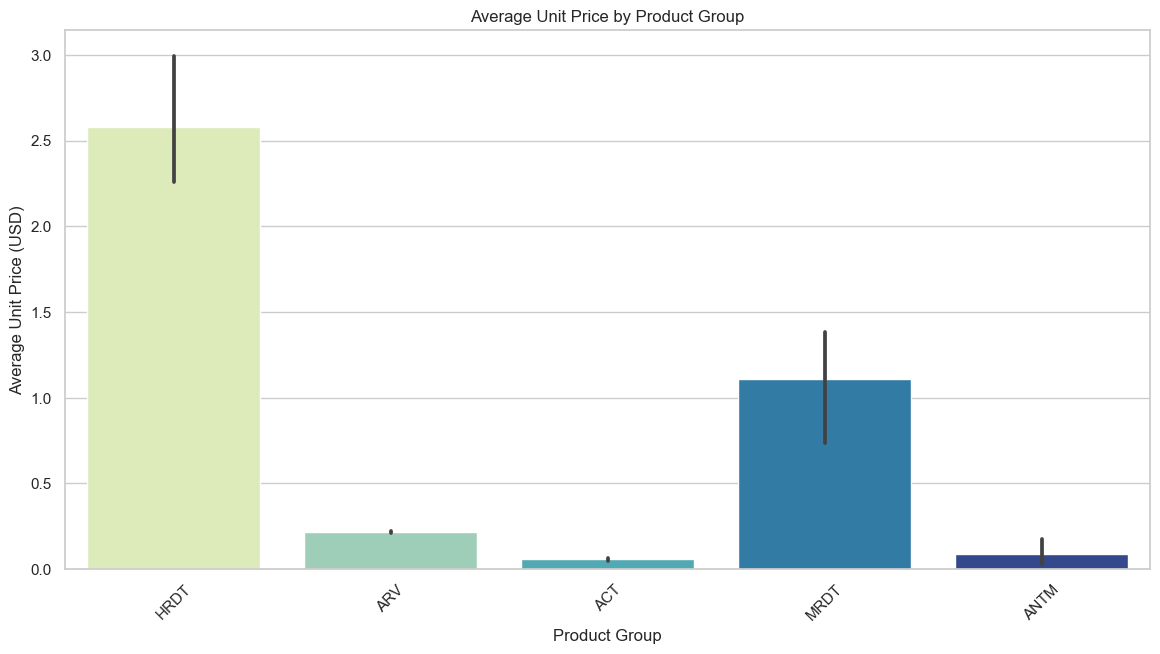

In [112]:
## 10. Product Group vs Average Unit Price

plt.figure(figsize=(14,7))
sns.barplot(data=df, x='product_group', y='unit_price', palette='YlGnBu')  # corrected y axis
plt.title('Average Unit Price by Product Group')
plt.xticks(rotation=45)
plt.xlabel('Product Group')
plt.ylabel('Average Unit Price (USD)')
plt.show()


1. Why did you pick the specific chart?
- Highlights product category cost differences.

2. What is/are the insight(s) found from the chart?
- Certain product groups have much higher shipping costs.

3. Will the gained insights help creating a positive business impact?
- Yes. Enables targeted cost reduction strategies.
"""

# --- Key Insights ---
"""
- Air shipments are the most common but also the most costly.
- Late deliveries are frequent, especially in South America and Sub-Saharan Africa.
- Shipment mode significantly impacts delivery status.
- Delivery delays vary widely; many deliveries are overdue.
- Certain product groups incur higher shipment costs.
"""

# --- Business Solutions ---
"""
- Implement regional hubs to address problem areas.
- Encourage the use of Truck and Ship modes where possible to reduce costs.
- Analyze expensive product categories for cost-cutting measures.
- Introduce predictive maintenance and tracking systems for better shipment forecasting.
"""

# --- Conclusion ---
"""
This detailed EDA provides FedEx with valuable insights into their supply chain challenges.
Identifying trends and issues enables the company to enhance delivery performance, reduce operational costs, and improve customer satisfaction.
Future work could include predictive modeling based on delivery delays and shipment costs.
"""

Index(['id', 'project_code', 'pq_#', 'po_/_so_#', 'asn/dn_#', 'country',
       'managed_by', 'fulfill_via', 'vendor_inco_term', 'shipment_mode',
       'pq_first_sent_to_client_date', 'po_sent_to_vendor_date',
       'scheduled_delivery_date', 'delivered_to_client_date',
       'delivery_recorded_date', 'product_group', 'sub_classification',
       'vendor', 'item_description', 'molecule/test_type', 'brand', 'dosage',
       'dosage_form', 'unit_of_measure_(per_pack)', 'line_item_quantity',
       'line_item_value', 'pack_price', 'unit_price', 'manufacturing_site',
       'first_line_designation', 'weight_(kilograms)', 'freight_cost_(usd)',
       'line_item_insurance_(usd)', 'delivery_status', 'delivery_delay'],
      dtype='object')
